# UNIVARIATE LINEAR REGRESSION

In [1]:
#### Load the data and libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\marri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#changed default runtime configuration
plt.rcParams['figure.figsize']=(12,8)

In [4]:
# reading the dataset
data = pd.read_csv('bike_sharing_data.txt')

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualise the data

Text(0.5, 1.0, 'Profit in $10,000s v/s City Population in 10,000s')

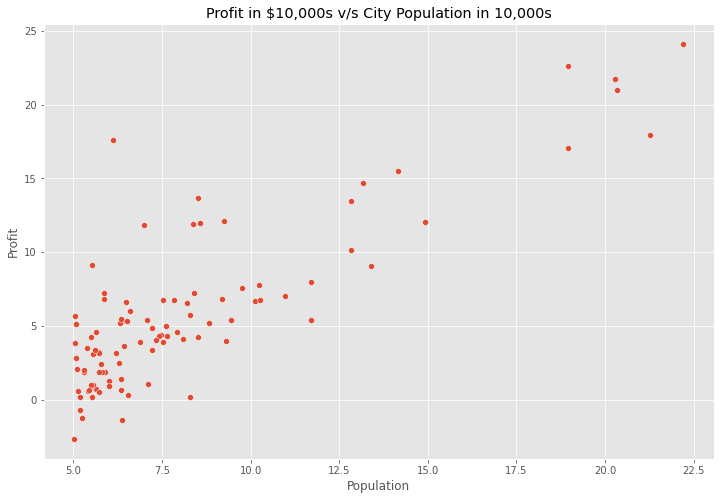

In [7]:
ax=sns.scatterplot(x="Population",y="Profit",data=data)
ax.set_title("Profit in $10,000s v/s City Population in 10,000s")

In [8]:
# Compute cost function
def cost_function(x,y,theta):
    m=len(y)
    y_pred=X.dot(theta)
    error = (y_pred -y)**2
    
    return (1/(2*m))*np.sum(error)
    

In [9]:
m = data.Population.size
m

97

In [10]:
X=np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

In [11]:
theta

array([[0.],
       [0.]])

In [12]:
#print(x) X.info()
#print(y) y.info()

In [13]:
X=np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

### Task 5 Gradient Descent

In [14]:
# minimize the cost function by updating the equation and repeat unitl convergence

In [15]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    # create a list of all the cost to track its histories
    costs=[]
    for i in range(iterations):
        y_pred=X.dot(theta)
        error=np.dot(X.transpose(),(y_pred-y))
        theta-= alpha * (1/m) * error
        costs.append(cost_function(X,y,theta))
    return theta,costs

        

In [16]:
# run gradient descent on the data
theta,costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x) = {} + {}x1 ".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1 


##### Visualise the cost function

In [17]:
# to get 3d graphs
from mpl_toolkits.mplot3d import Axes3D

In [18]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
# establishing size of cost values on len of theta0 and theta1
cost_values = np.zeros((len(theta_0),len(theta_1)))
    
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i],theta_1[j]])
        # to get initial cost values
        cost_values[i,j] = cost_function(X,y,t)

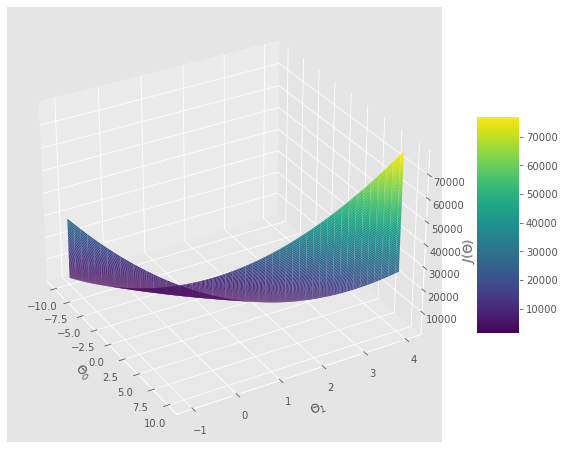

In [21]:
# plot the 3d graph on 2d using interpolation
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf=ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)


plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
# rotate with initial view angle
ax.view_init(30,330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of Gradient Descent')

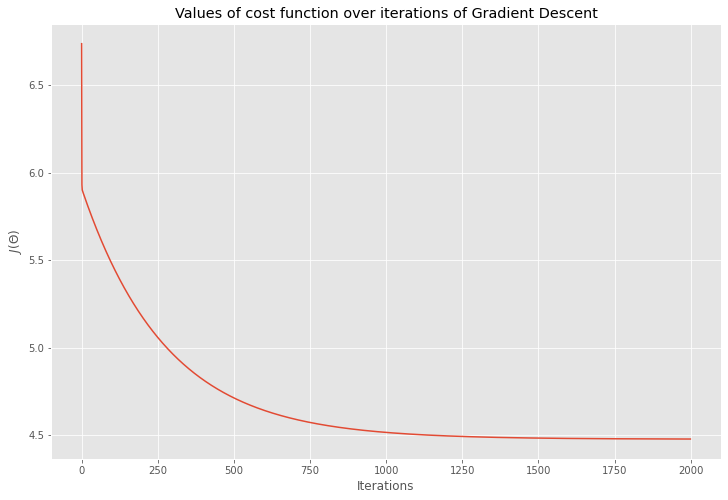

In [25]:
# lets plot how the cost number varies with iterations
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of Gradient Descent")

Text(0.5, 1.0, 'Linear Regression Fit')

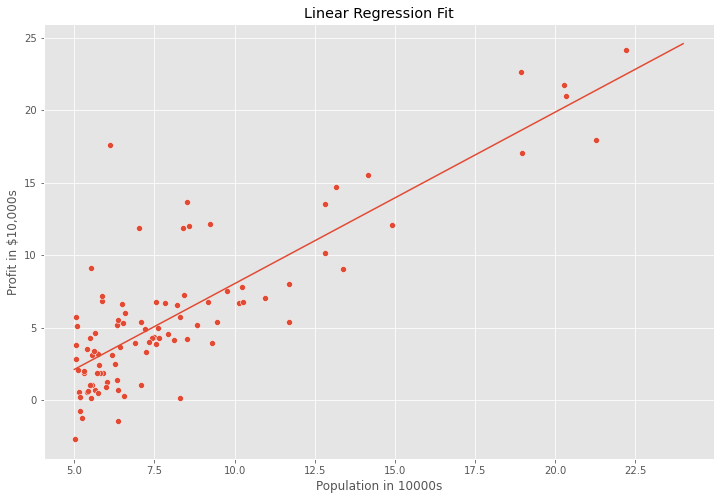

In [27]:
# check the linear regression fit
theta = np.squeeze(theta)
sns.scatterplot(x="Population",y="Profit",data=data)

x_value = [x for x in range(5,25)]
y_value = [(x* theta[1] + theta[0]) for x in x_value]
sns.lineplot(x=x_value,y=y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

In [28]:
theta

array([-3.78806857,  1.18221277])

###### infernces on Profit in CIties out of range of the data that is beyon 20k

In [30]:
#define a predict function
def predict(x,theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [34]:
y_pred_1 = predict(np.array([1,4]),theta) *10000
y_pred_2 = predict(np.array([1,8.3]),theta)*10000

print("For a population of 40,000 people, The model predicts a profit of ${}".format(round(y_pred_1,2)))
print("For a population of 83,000 people, The model predicts a profit of ${}".format(round(y_pred_2,2)))


For a population of 40,000 people, The model predicts a profit of $9407.83
For a population of 83,000 people, The model predicts a profit of $60242.97
